In [1]:
import pandas as pd

column = 'race'
group1 = 'white'
group2 = 'black'

# column = 'gender'
# group1 = 'male'
# group2 = 'female'

# column = 'age'
# group1 = 'child'
# group2 = 'adult'

# column = 'edulevel'
# group1 = 'low'
# group2 = 'high'

file_path = f'../results/processed_data/3_1_calculated_ressults/3_1_calculated_results_v6_{column}.csv'

df = pd.read_csv(file_path)
df.drop('Unnamed: 0', axis=1, inplace=True)
df_gr1 = df[df['ptid_group'] == group1]
df_gr2 = df[df['ptid_group'] == group2]
df
df_gr1

,PtID,ratio,ptid_test,ptid_group,rmse_naive,rmse_single,rmse_base,rmse_tl
2,59,100,59,white,1.901273,1.919963,1.618053,1.639034
5,149,50,149,white,3.291826,2.984098,2.848826,2.748476
7,183,30,183,white,2.325091,2.588161,2.095167,2.063913
11,160,40,160,white,1.639034,1.644919,1.363734,1.351519
12,105,70,105,white,1.740725,1.527539,1.357279,1.355814
...,...,...,...,...,...,...,...,...
2239,38,50,38,white,2.267859,2.459428,1.880111,1.881850
2241,212,10,212,white,1.541160,1.387813,1.283499,1.265154
2247,181,50,181,white,1.681525,1.890244,1.615774,1.603400
2251,107,10,107,white,3.030162,2.706879,2.442499,2.387954


In [2]:
# import numpy as np
# df_gr1 = df_gr1[df_gr1['ratio'] == 20]
# df_gr1

# ci_lower = df_gr1.rmse_naive.mean() - 1.96 * (df_gr1.rmse_naive.std() / np.sqrt(len(df_gr1.rmse_naive)))
# ci_upper = df_gr1.rmse_naive.mean() + 1.96 * (df_gr1.rmse_naive.std() / np.sqrt(len(df_gr1.rmse_naive)))

# print (df_gr1.rmse_naive.mean())
# print (df_gr1.rmse_naive.std())
# print ("lower:",ci_lower,"upper:", ci_upper)

In [3]:
df_gr2

,PtID,ratio,ptid_test,ptid_group,rmse_naive,rmse_single,rmse_base,rmse_tl
0,172,100,172,black,1.927027,2.043796,1.629843,1.631561
1,158,0,158,black,3.063354,3.747017,2.263687,2.284283
3,79,10,79,black,1.310273,1.473037,1.170468,1.165142
4,210,70,210,black,1.932668,2.052116,1.654491,1.656142
6,35,30,35,black,3.034753,4.457491,4.490728,4.295200
...,...,...,...,...,...,...,...,...
2248,123,80,123,black,1.330592,1.203260,1.063990,1.062342
2249,144,30,144,black,2.277835,2.886935,2.173581,2.140054
2250,52,60,52,black,2.329977,2.156117,1.842846,1.841241
2252,130,100,130,black,1.704810,1.806231,1.470211,1.470795


In [4]:
def calculate_mean_and_95CI(df):
  
    import numpy as np
    import seaborn as sns

    # List of RMSE columns
    rmse_columns = [col for col in df.columns if 'rmse_' in col]

    # Initialize a list to store each row of the final DataFrame
    rows_list = []
    stats_dict = {}

    # Calculate the statistics for each RMSE column
    for col in rmse_columns:
        col_data = df[col].dropna()  # Exclude NaN values for the calculation
        mean = col_data.mean()
        median = col_data.median()
        std = col_data.std()
        # Confidence interval calculation
        ci_lower = mean - 1.96 * (std / np.sqrt(len(col_data)))
        ci_upper = mean + 1.96 * (std / np.sqrt(len(col_data)))
        
        # Store the statistics in the dictionary
        stats_dict[f'{col}_mean'] = mean
        # stats_dict[f'{col}_median'] = median
        # stats_dict[f'{col}_std'] = std
        stats_dict[f'{col}_95p_CI_Lower'] = ci_lower
        stats_dict[f'{col}_95p_CI_Upper'] = ci_upper

    # Append the stats for the current ratio to the rows_list
    rows_list.append(stats_dict)

    # Create the final DataFrame
    df_stats = pd.DataFrame(rows_list)
    return df_stats

df_results1 = calculate_mean_and_95CI(df_gr1)
df_results2 = calculate_mean_and_95CI(df_gr2)
df_results = calculate_mean_and_95CI(df)
# df_results1.T
df_results.T

,0
rmse_naive_mean,2.427535
rmse_naive_95p_CI_Lower,2.401210
rmse_naive_95p_CI_Upper,2.453861
rmse_single_mean,2.600117
rmse_single_95p_CI_Lower,2.565854
rmse_single_95p_CI_Upper,2.634381
rmse_base_mean,2.041331
rmse_base_95p_CI_Lower,2.019902
rmse_base_95p_CI_Upper,2.062759
rmse_tl_mean,2.011904


In [5]:
df_results1.T

,0
rmse_naive_mean,2.445957
rmse_naive_95p_CI_Lower,2.408363
rmse_naive_95p_CI_Upper,2.483552
rmse_single_mean,2.540640
rmse_single_95p_CI_Lower,2.492861
rmse_single_95p_CI_Upper,2.588420
rmse_base_mean,2.070305
rmse_base_95p_CI_Lower,2.040388
rmse_base_95p_CI_Upper,2.100222
rmse_tl_mean,2.036890


In [6]:
file_path_gender = f'../results/processed_data/3_1_calculated_ressults/3_1_calculated_results_v6_gender.csv'
file_path_age = f'../results/processed_data/3_1_calculated_ressults/3_1_calculated_results_v6_age.csv'
file_path_race = f'../results/processed_data/3_1_calculated_ressults/3_1_calculated_results_v6_race.csv'

df_gender = pd.read_csv(file_path_gender)
df_age = pd.read_csv(file_path_age)
df_race = pd.read_csv(file_path_race)

df_gender.drop('Unnamed: 0', axis=1, inplace=True)
df_age.drop('Unnamed: 0', axis=1, inplace=True)
df_race.drop('Unnamed: 0', axis=1, inplace=True)

df_combined = pd.concat([df_race, df_gender, df_age ], axis=0)
df_results = calculate_mean_and_95CI(df_combined)

df_gr1_race = df_race[df_race['ptid_group']=='white']
df_gr2_race = df_race[df_race['ptid_group']=='black']

df_gr1_gender = df_gender[df_gender['ptid_group']=='male']
df_gr2_gender = df_gender[df_gender['ptid_group']=='female']

df_gr1_age = df_age[df_age['ptid_group']=='child']
df_gr2_age = df_age[df_age['ptid_group']=='adult']


df_results_gr1_race = calculate_mean_and_95CI(df_gr1_race)
df_results_gr2_race = calculate_mean_and_95CI(df_gr2_race)

df_results_gr1_gender = calculate_mean_and_95CI(df_gr1_gender)
df_results_gr2_gender = calculate_mean_and_95CI(df_gr2_gender)

df_results_gr1_age = calculate_mean_and_95CI(df_gr1_age)
df_results_gr2_age = calculate_mean_and_95CI(df_gr2_age)




In [7]:
df_results_gr1_race 


,rmse_naive_mean,rmse_naive_95p_CI_Lower,rmse_naive_95p_CI_Upper,rmse_single_mean,rmse_single_95p_CI_Lower,rmse_single_95p_CI_Upper,rmse_base_mean,rmse_base_95p_CI_Lower,rmse_base_95p_CI_Upper,rmse_tl_mean,rmse_tl_95p_CI_Lower,rmse_tl_95p_CI_Upper
0,2.445957,2.408363,2.483552,2.54064,2.492861,2.58842,2.070305,2.040388,2.100222,2.03689,2.007843,2.065937


In [8]:
import seaborn as sns

def calc_stats_results(df):
  
    import numpy as np
    import seaborn as sns

    # List of RMSE columns
    rmse_columns = [col for col in df.columns if 'rmse_' in col]
    # Initialize a list to store each row of the final DataFrame
    rows_list = []

    # Loop over each ratio_w value
    for ratio in df['ratio'].unique():
        # Filter the DataFrame for the current ratio
        df_ratio = df[df['ratio'] == ratio]
        
        # Initialize a dictionary to store the stats for the current ratio
        stats_dict = {'ratio': ratio}
        
        # Calculate the statistics for each RMSE column
        for col in rmse_columns:
            col_data = df_ratio[col].dropna()  # Exclude NaN values for the calculation
            mean = col_data.mean()
            median = col_data.median()
            std = col_data.std()
            # Confidence interval calculation
            ci_lower = mean - 1.96 * (std / np.sqrt(len(col_data)))
            ci_upper = mean + 1.96 * (std / np.sqrt(len(col_data)))
            
            # Store the statistics in the dictionary
            stats_dict[f'{col}_mean'] = mean
            # stats_dict[f'{col}_median'] = median
            # stats_dict[f'{col}_std'] = std
            stats_dict[f'{col}_95p_CI_Lower'] = ci_lower
            stats_dict[f'{col}_95p_CI_Upper'] = ci_upper

        # Append the stats for the current ratio to the rows_list
        rows_list.append(stats_dict)

    # Create the final DataFrame
    df_stats = pd.DataFrame(rows_list)
    return df_stats

df_stats_gr1 = calc_stats_results(df_gr1)
df_stats_gr2 = calc_stats_results(df_gr2)
df_stats_all = calc_stats_results(df_combined)


df_stats_gr1_race = calc_stats_results(df_gr1_race)
df_stats_gr2_race = calc_stats_results(df_gr2_race)

In [9]:
df_stats_gr2

,ratio,rmse_naive_mean,rmse_naive_95p_CI_Lower,rmse_naive_95p_CI_Upper,rmse_single_mean,rmse_single_95p_CI_Lower,rmse_single_95p_CI_Upper,rmse_base_mean,rmse_base_95p_CI_Lower,rmse_base_95p_CI_Upper,rmse_tl_mean,rmse_tl_95p_CI_Lower,rmse_tl_95p_CI_Upper
0,100,2.409645,2.286852,2.532438,2.644605,2.493938,2.795272,2.012807,1.914940,2.110674,1.983352,1.888452,2.078252
1,0,2.409645,2.286852,2.532438,2.670157,2.499297,2.841017,1.995863,1.899920,2.091805,1.971755,1.878094,2.065416
2,10,2.409645,2.286852,2.532438,2.634251,2.480838,2.787663,1.995947,1.899903,2.091991,1.971985,1.878122,2.065847
3,70,2.409645,2.286852,2.532438,2.642588,2.487648,2.797527,2.003880,1.906671,2.101089,1.978600,1.884506,2.072693
4,30,2.409645,2.286852,2.532438,2.665188,2.507662,2.822714,2.014426,1.908070,2.120781,1.990744,1.887937,2.093551
5,60,2.409645,2.286852,2.532438,2.695602,2.528570,2.862635,2.010754,1.912837,2.108672,1.985222,1.889856,2.080588
6,90,2.409645,2.286852,2.532438,2.706912,2.492030,2.921795,2.008731,1.911104,2.106357,1.981548,1.887067,2.076028
7,80,2.409645,2.286852,2.532438,2.603713,2.449470,2.757955,2.048969,1.933951,2.163986,2.020503,1.908518,2.132489
8,20,2.409645,2.286852,2.532438,2.671230,2.520730,2.821729,2.024060,1.917859,2.130260,2.001167,1.896556,2.105777
9,50,2.409645,2.286852,2.532438,2.608617,2.462737,2.754496,2.028147,1.917204,2.139090,2.002480,1.894808,2.110151


In [10]:
# file_path_save = f'../results/processed_data/3_1_calculated_ressults/3_2_rmse_summary_per_ratio_{column}.csv'
# df_stats_gr1.to_csv(file_path_save)

In [11]:
df_stats_gr2

,ratio,rmse_naive_mean,rmse_naive_95p_CI_Lower,rmse_naive_95p_CI_Upper,rmse_single_mean,rmse_single_95p_CI_Lower,rmse_single_95p_CI_Upper,rmse_base_mean,rmse_base_95p_CI_Lower,rmse_base_95p_CI_Upper,rmse_tl_mean,rmse_tl_95p_CI_Lower,rmse_tl_95p_CI_Upper
0,100,2.409645,2.286852,2.532438,2.644605,2.493938,2.795272,2.012807,1.914940,2.110674,1.983352,1.888452,2.078252
1,0,2.409645,2.286852,2.532438,2.670157,2.499297,2.841017,1.995863,1.899920,2.091805,1.971755,1.878094,2.065416
2,10,2.409645,2.286852,2.532438,2.634251,2.480838,2.787663,1.995947,1.899903,2.091991,1.971985,1.878122,2.065847
3,70,2.409645,2.286852,2.532438,2.642588,2.487648,2.797527,2.003880,1.906671,2.101089,1.978600,1.884506,2.072693
4,30,2.409645,2.286852,2.532438,2.665188,2.507662,2.822714,2.014426,1.908070,2.120781,1.990744,1.887937,2.093551
5,60,2.409645,2.286852,2.532438,2.695602,2.528570,2.862635,2.010754,1.912837,2.108672,1.985222,1.889856,2.080588
6,90,2.409645,2.286852,2.532438,2.706912,2.492030,2.921795,2.008731,1.911104,2.106357,1.981548,1.887067,2.076028
7,80,2.409645,2.286852,2.532438,2.603713,2.449470,2.757955,2.048969,1.933951,2.163986,2.020503,1.908518,2.132489
8,20,2.409645,2.286852,2.532438,2.671230,2.520730,2.821729,2.024060,1.917859,2.130260,2.001167,1.896556,2.105777
9,50,2.409645,2.286852,2.532438,2.608617,2.462737,2.754496,2.028147,1.917204,2.139090,2.002480,1.894808,2.110151


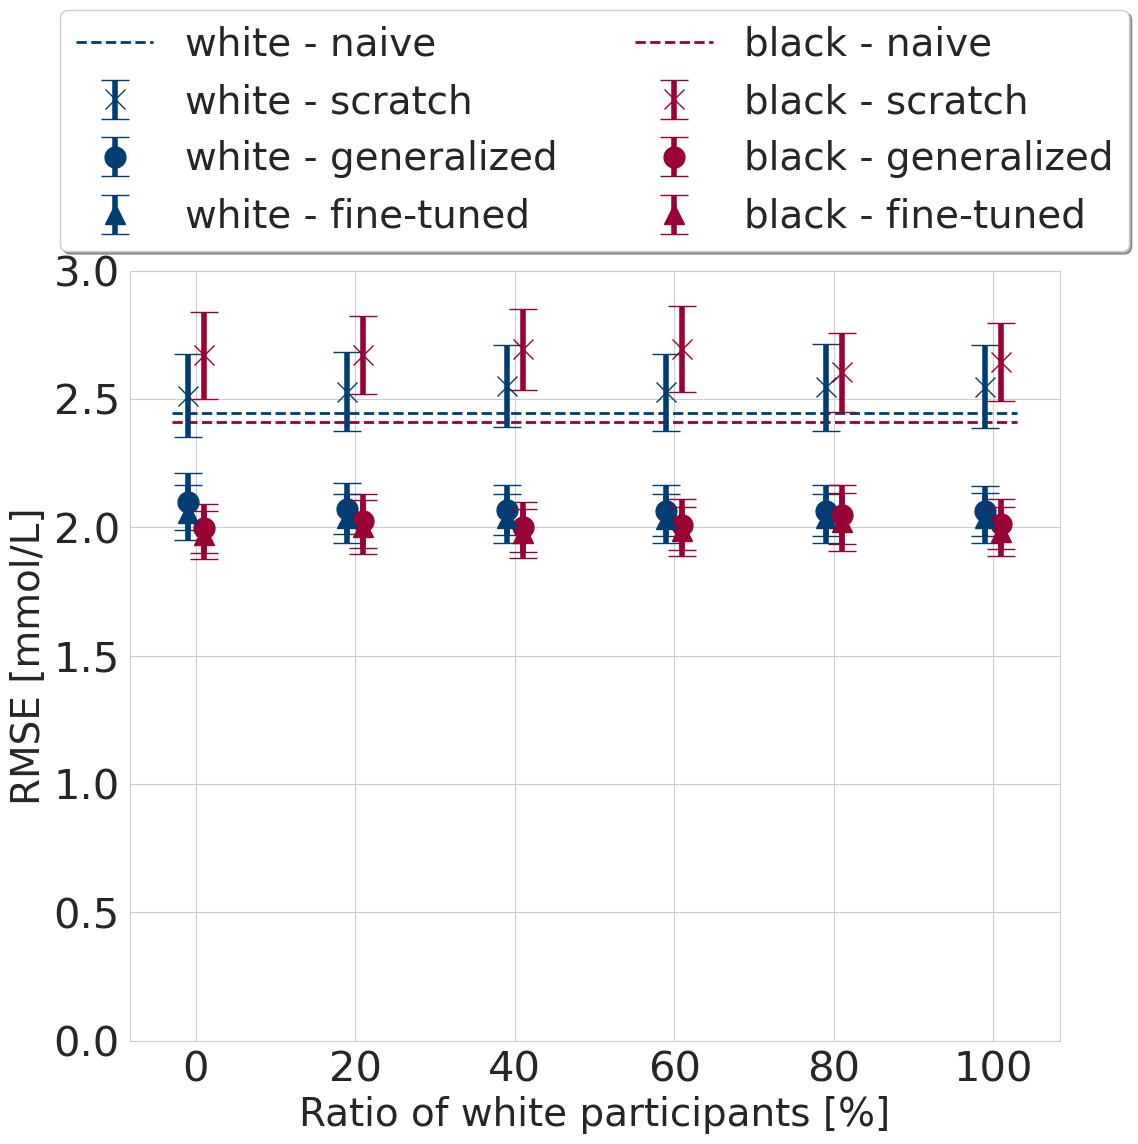

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

file_name_with_extension = file_path.split("/")[-1]
file_name = file_name_with_extension.split(".")[0]

sns.set_style("whitegrid")
plt.figure(figsize=(12, 10))
# df_gr1_filtered =df_gr1.copy()
# df_gr2_filtered =df_gr1.copy()

df_gr1_filtered=df_gr1[df_gr1['ratio'].isin([0, 20, 40, 60, 80, 100])].copy()
df_gr2_filtered =df_gr2[df_gr2['ratio'].isin([0, 20, 40, 60, 80, 100])].copy()
df_stats_gr1 = df_stats_gr1[df_stats_gr1['ratio'].isin([0, 20, 40, 60, 80, 100])].copy()
df_stats_gr2 = df_stats_gr2[df_stats_gr2['ratio'].isin([0, 20, 40, 60, 80, 100])].copy()


rmse_col_gr1 = df_gr1_filtered['rmse_base']
rmse_col_gr2 = df_gr2_filtered['rmse_base']

rmse_col_tl_gr1 = df_gr1_filtered['rmse_tl']
rmse_col_tl_gr2 = df_gr2_filtered['rmse_tl']

rmse_col_single_gr1=df_gr1_filtered['rmse_single']
rmse_col_single_gr2=df_gr2_filtered['rmse_single']

gr1_color = "#003d73"
gr2_color = "#990033"
# gr1_color = "#D79B00"
# gr2_color = "#9673A6"
# gr3_color = "#21918c"
alpha_value = 0.5  # saturation
marker1 = "o"
marker2 = "^"
marker3 = "x"

y_group1 = df_stats_gr1['rmse_base_mean']
y_group2 = df_stats_gr2['rmse_base_mean']
y_group1_CI95_l = df_stats_gr1['rmse_base_95p_CI_Lower']
y_group1_CI95_u = df_stats_gr1['rmse_base_95p_CI_Upper']
y_group2_CI95_l = df_stats_gr2['rmse_base_95p_CI_Lower']
y_group2_CI95_u = df_stats_gr2['rmse_base_95p_CI_Upper']

y_group1_tl = df_stats_gr1['rmse_tl_mean']
y_group2_tl = df_stats_gr2['rmse_tl_mean']
y_group1_CI95_l_tl = df_stats_gr1['rmse_tl_95p_CI_Lower']
y_group1_CI95_u_tl = df_stats_gr1['rmse_tl_95p_CI_Upper']
y_group2_CI95_l_tl = df_stats_gr2['rmse_tl_95p_CI_Lower']
y_group2_CI95_u_tl = df_stats_gr2['rmse_tl_95p_CI_Upper']

y_group1_single = df_stats_gr1['rmse_single_mean']
y_group2_single = df_stats_gr2['rmse_single_mean']
y_group1_CI95_l_single = df_stats_gr1['rmse_single_95p_CI_Lower']
y_group1_CI95_u_single = df_stats_gr1['rmse_single_95p_CI_Upper']
y_group2_CI95_l_single = df_stats_gr2['rmse_single_95p_CI_Lower']
y_group2_CI95_u_single = df_stats_gr2['rmse_single_95p_CI_Upper']


if column == 'age':
    offset = 0
else:
    offset = 1  # How much to offset the bars

x_values_gr1 = df_stats_gr1['ratio'] - offset
x_values_gr2 = df_stats_gr2['ratio'] + offset
x_tl_values_gr1 = df_stats_gr1['ratio'] - offset
x_tl_values_gr2 = df_stats_gr2['ratio'] + offset

x_single_values_gr1 = df_stats_gr1['ratio'] - offset
x_single_values_gr2 = df_stats_gr2['ratio'] + offset


# Calculate the errors from the means to the confidence interval limits
yerr_group1 = [y_group1 - y_group1_CI95_l, y_group1_CI95_u - y_group1]
yerr_group2 = [y_group2 - y_group2_CI95_l, y_group2_CI95_u - y_group2]

yerr_group1_tl = [y_group1_tl - y_group1_CI95_l_tl, y_group1_CI95_u_tl - y_group1_tl]
yerr_group2_tl = [y_group2_tl - y_group2_CI95_l_tl, y_group2_CI95_u_tl - y_group2_tl]

yerr_group1_single = [y_group1_single - y_group1_CI95_l_single, y_group1_CI95_u_single - y_group1_single]
yerr_group2_single = [y_group2_single - y_group2_CI95_l_single, y_group2_CI95_u_single - y_group2_single]

y_value_gr1 = df_results1['rmse_naive_mean'].iloc[0]  # The y-value where you want to draw the horizontal line
y_value_gr2 = df_results2['rmse_naive_mean'].iloc[0]  # The y-value where you want to draw the horizontal line

my_einwidth = 4

# # Plot the single means with error bars
line1, = plt.plot([-3, 103], [y_value_gr1, y_value_gr1], color=gr1_color, linestyle='--', linewidth=2)#, label=f'Group 1 - naive ({round(y_value_gr1, 2)})')
# plt.fill_between([0, 100], y_value_gr1, y_value_gr1, color=gr1_color, linestyle='--', linewidth=2, label=f'Group 1 - naive ({round(y_value_gr1, 2)})', alpha=1)

# plt.axhline(y=y_value_gr1, color=gr1_color, linestyle='--', linewidth=2, label=f'{group1} - naive ({round(y_value_gr1,2)})', zorder=1)
err1 = plt.errorbar(x=x_values_gr1, y=y_group1, yerr=yerr_group1, fmt=marker1, color=gr1_color, capsize=10, markersize=15, elinewidth=my_einwidth, zorder=2) # label=f'{group1} - generalized', elinewidth=10, markersize=15, capthick=10)
err2 = plt.errorbar(x=x_tl_values_gr1, y=y_group1_tl, yerr=yerr_group1_tl, fmt=marker2, color=gr1_color, capsize=10, markersize=15, elinewidth=my_einwidth, zorder=3) # , label=f'{group1} - fine-tuned'
err5 = plt.errorbar(x=x_single_values_gr1, y=y_group1_single, yerr=yerr_group1_single, fmt=marker3, color=gr1_color, capsize=10, markersize=15, elinewidth=my_einwidth, zorder=4) # label=f'{group1} - generalized', elinewidth=10, markersize=15, capthick=10)
# plt.fill_between([0, 100], y_value_gr2, y_value_gr2, color=gr2_color, linestyle='--', linewidth=2, label=f'Group 2 - naive ({round(y_value_gr2, 2)})', alpha=1)

# # repeat for group 2
# Plot horizontal lines using plot
line2, = plt.plot([-3, 103], [y_value_gr2, y_value_gr2], color=gr2_color, linestyle='--', linewidth=2)# , label=f'Group 2 - naive ({round(y_value_gr2, 2)})')
# plt.axhline(y=y_value_gr2, color=gr2_color, linestyle='--', linewidth=2, label=f'{group2} - naive ({round(y_value_gr2,2)})', zorder=1)
err3 = plt.errorbar(x=x_values_gr2, y=y_group2, yerr=yerr_group2, fmt=marker1, color=gr2_color,  capsize=10, markersize=15, elinewidth=my_einwidth, zorder=2) # label=f'{group2} - generalized', elinewidth=10, markersize=14, capthick=10)
err4 = plt.errorbar(x=x_tl_values_gr2, y=y_group2_tl, yerr=yerr_group2_tl, fmt=marker2, color=gr2_color, capsize=10, markersize=15, elinewidth=my_einwidth, zorder=3) #  label=f'{group2} - fine-tuned', 
err6 = plt.errorbar(x=x_single_values_gr2, y=y_group2_single, yerr=yerr_group2_single, fmt=marker3, color=gr2_color, capsize=10, markersize=15, elinewidth=my_einwidth, zorder=4) # label=f'{group1} - generalized', elinewidth=10, markersize=15, capthick=10)


# Custom legend order
handles = [
    line1, err5, err1, err2, 
    line2, err6, err3, err4
]
labels = [
    f'{group1} - naive',  f'{group1} - scratch', f'{group1} - generalized', f'{group1} - fine-tuned',
    f'{group2} - naive',  f'{group2} - scratch', f'{group2} - generalized', f'{group2} - fine-tuned'
]
plt.legend(handles=handles, labels=labels, loc='lower center', bbox_to_anchor=(0.5, 1), ncol=2, fancybox=True, shadow=True, fontsize='28')



# Set the legend and labels
# plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize='20')#, title="RMSE",title_fontsize='25')
# # plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=2, fancybox=True, shadow=True, fontsize='28') # this was the last one I used!!!!!!!!
# plt.title(f'{file_name}: \n Mean RMSE and 95%CI', fontsize=30)
my_pad = 165
if column == 'age':
    plt.title(f'Age ', fontsize=30, pad=my_pad)#(n = 82 children & 123 adults)\n group - model', fontsize=30, pad=160)#'Root Mean-Squared Errors with 95% CIs', fontsize=30, pad= 120)
elif column == 'race':
    plt.title(f'Race ',fontsize=30, pad=my_pad)#(n = 101 whites & 104 blacks)\n group - model', fontsize=30, pad=160)#'Root Mean-Squared Errors with 95% CIs', fontsize=30, pad= 120)
else:
    plt.title(f'Sex ', fontsize=30, pad=my_pad)#(n = 88 males & 117 females)\n group - model', fontsize=30, pad=160)#'Root Mean-Squared Errors with 95% CIs', fontsize=30, pad= 120)

# plt.suptitle('group - model', fontsize=30, va='center')
plt.xlabel(f'Ratio of {group1} participants [%]', fontsize=28)
plt.ylabel('RMSE [mmol/L]', fontsize=28)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.ylim(bottom=0)
plt.ylim(top=3)
# plt.xticks(df_stats_gr1['ratio'])
# plt.text(53, 0.2, 'Average RMSEs across all ratios \n(mean[95% CI] mmol/L)\n     Before fine-tuning\n        White: 2.81[2.76, 2.85]\n        Black: 2.71[2.65, 2.77]\n     After fine-tuning\n        White: 2.06[2.04, 2.09]\n        Black: 2.00[1.98, 2.03]', fontsize=18,
#          bbox=dict(facecolor='lightgray', alpha=0.5, edgecolor='black', boxstyle='round,pad=1'))
# plt.ylim(0, 3.5)



# Show the plot
# Get current axes

# plt.savefig(f'../results/processed_data/3_1_calculated_ressults/3_1_calculated_results_v6_{column}.png', dpi=600, format='png')  # Save as high-resolution PNG file

#plt.show()

y_diff1 = y_group1-y_group1_tl
y_diff2 = y_diff1.mean()


y_diff3 = y_group2-y_group2_tl
y_diff4 = y_diff3.mean()



In [13]:
## Plot to compare to baseline

import numpy as np
# Define a function to create the plot based on the RMSE column names
def plot_rmse(df, df_stats, rmse_col_w, rmse_col_b, file_name, gr1_color = 'b', gr2_color = 'r'):
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 8))

    # Group by ratio and calculate means
    df_mean = df.groupby('ratio')[[rmse_col_w, rmse_col_b]].mean().reset_index()

    # Get the mean and standard deviation values
    y_group1 = df_mean[rmse_col_w]
    y_group2 = df_mean[rmse_col_b]
    y_group1_CI95 = df_stats[rmse_col_w + '_std']
    y_group2_CI95 = df_stats[rmse_col_b + '_std']

    # Plot settings
    my_s = 150
    my_s2 = 100

    # Plot the means
    plt.scatter(x=df_mean['ratio'], y=y_group1, label=rmse_col_w, color=gr1_color, s=my_s)
    plt.scatter(x=df_mean['ratio'], y=y_group2, label=rmse_col_b, color=gr2_color, s=my_s)

    # Plot the standard deviations
    plt.scatter(x=df_mean['ratio'], y=y_group1 - y_group1_CI95, color=gr1_color, marker='_', s=my_s2, label = f'std of {rmse_col_w}:')
    plt.scatter(x=df_mean['ratio'], y=y_group1 + y_group1_CI95, color=gr1_color, marker='_', s=my_s2)
    plt.scatter(x=df_mean['ratio'], y=y_group2 - y_group2_CI95, color=gr2_color, marker='_', s=my_s2, label = f'std of {rmse_col_b}:')
    plt.scatter(x=df_mean['ratio'], y=y_group2 + y_group2_CI95, color=gr2_color, marker='_', s=my_s2)

    # Set the legend and labels
    plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize='20')
    plt.title(f'{file_name}: \n Mean RMSE and Standard Deviation of {rmse_col_w} and {rmse_col_b}', fontsize=30)
    plt.xlabel('Ratio', fontsize=24)
    plt.ylabel('Mean RMSE', fontsize=24)
    plt.tick_params(axis='both', which='major', labelsize=20)

    # Show the plot
    plt.show()





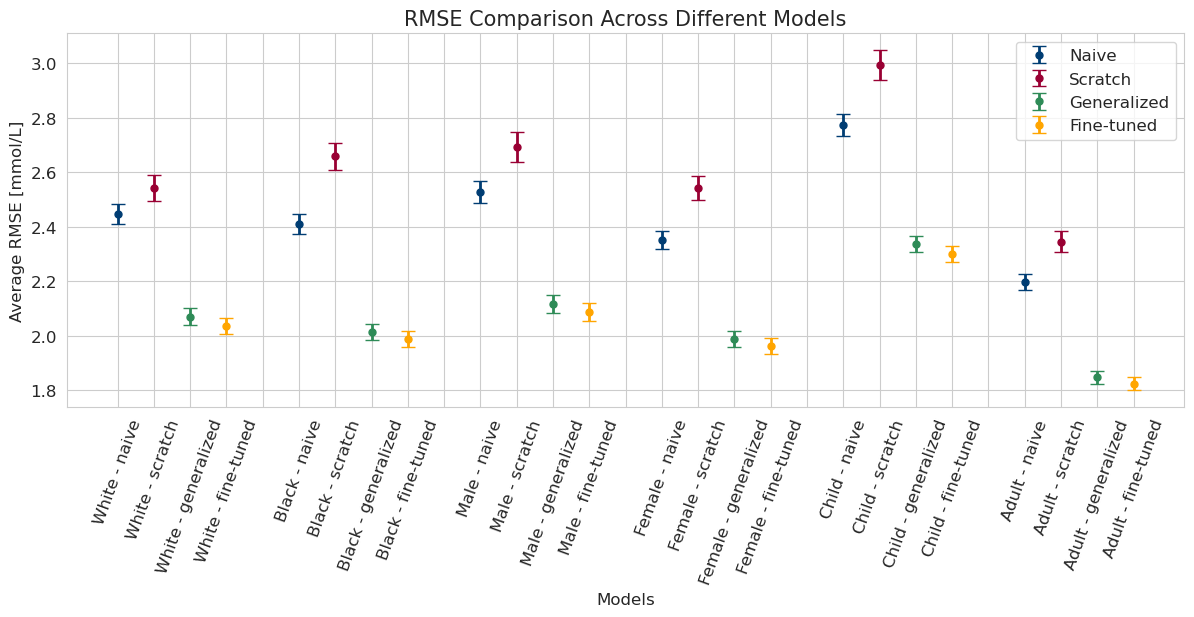

In [14]:
import matplotlib.pyplot as plt
import numpy as np
color1 = "#003d73"
color2 = "#990033"
color3 = '#2E8B57' # (Sea Green)
color4 = '#FFA500' # (Orange)
    
# Example data
categories = ['White - naive', 'White - scratch', 'White - generalized', 'White - fine-tuned',
              '     ',
              'Black - naive', 'Black - scratch', 'Black - generalized', 'Black - fine-tuned',
              '     ',
              'Male - naive',  'Male - scratch',  'Male - generalized',  'Male - fine-tuned',
              '     ',
              'Female - naive','Female - scratch','Female - generalized','Female - fine-tuned',
              '     ',
              'Child - naive', 'Child - scratch', 'Child - generalized', 'Child - fine-tuned',
              '     ',
              'Adult - naive', 'Adult - scratch', 'Adult - generalized', 'Adult - fine-tuned']


y_gr1_race_naive  = df_results_gr1_race['rmse_naive_mean']
y_gr1_race_single = df_results_gr1_race['rmse_single_mean']
y_gr1_race_base   = df_results_gr1_race['rmse_base_mean']
y_gr1_race_tl     = df_results_gr1_race['rmse_tl_mean']

y_gr2_race_naive  = df_results_gr2_race['rmse_naive_mean']
y_gr2_race_single = df_results_gr2_race['rmse_single_mean']
y_gr2_race_base   = df_results_gr2_race['rmse_base_mean']
y_gr2_race_tl     = df_results_gr2_race['rmse_tl_mean']

y_gr1_gender_naive  = df_results_gr1_gender['rmse_naive_mean']
y_gr1_gender_single = df_results_gr1_gender['rmse_single_mean']
y_gr1_gender_base   = df_results_gr1_gender['rmse_base_mean']
y_gr1_gender_tl     = df_results_gr1_gender['rmse_tl_mean']

y_gr2_gender_naive  = df_results_gr2_gender['rmse_naive_mean']
y_gr2_gender_single = df_results_gr2_gender['rmse_single_mean']
y_gr2_gender_base   = df_results_gr2_gender['rmse_base_mean']
y_gr2_gender_tl     = df_results_gr2_gender['rmse_tl_mean']

y_gr1_age_naive  = df_results_gr1_age['rmse_naive_mean']
y_gr1_age_single = df_results_gr1_age['rmse_single_mean']
y_gr1_age_base   = df_results_gr1_age['rmse_base_mean']
y_gr1_age_tl     = df_results_gr1_age['rmse_tl_mean']

y_gr2_age_naive  = df_results_gr2_age['rmse_naive_mean']
y_gr2_age_single = df_results_gr2_age['rmse_single_mean']
y_gr2_age_base   = df_results_gr2_age['rmse_base_mean']
y_gr2_age_tl     = df_results_gr2_age['rmse_tl_mean']

yerr_gr1_race_naive = [y_gr1_race_naive - df_results_gr1_race['rmse_naive_95p_CI_Lower'],  df_results_gr1_race['rmse_naive_95p_CI_Upper']  - y_gr1_race_naive]
yerr_gr1_race_single= [y_gr1_race_single- df_results_gr1_race['rmse_single_95p_CI_Lower'], df_results_gr1_race['rmse_single_95p_CI_Upper'] - y_gr1_race_single]
yerr_gr1_race_base  = [y_gr1_race_base  - df_results_gr1_race['rmse_base_95p_CI_Lower'],   df_results_gr1_race['rmse_base_95p_CI_Upper']   - y_gr1_race_base]
yerr_gr1_race_tl    = [y_gr1_race_tl    - df_results_gr1_race['rmse_tl_95p_CI_Lower'],     df_results_gr1_race['rmse_tl_95p_CI_Upper']     - y_gr1_race_tl]

yerr_gr2_race_naive = [y_gr2_race_naive - df_results_gr2_race['rmse_naive_95p_CI_Lower'],  df_results_gr2_race['rmse_naive_95p_CI_Upper']  - y_gr2_race_naive]
yerr_gr2_race_single= [y_gr2_race_single- df_results_gr2_race['rmse_single_95p_CI_Lower'], df_results_gr2_race['rmse_single_95p_CI_Upper'] - y_gr2_race_single]
yerr_gr2_race_base  = [y_gr2_race_base  - df_results_gr2_race['rmse_base_95p_CI_Lower'],   df_results_gr2_race['rmse_base_95p_CI_Upper']   - y_gr2_race_base]
yerr_gr2_race_tl    = [y_gr2_race_tl    - df_results_gr2_race['rmse_tl_95p_CI_Lower'],     df_results_gr2_race['rmse_tl_95p_CI_Upper']     - y_gr2_race_tl]

yerr_gr1_gender_naive = [y_gr1_gender_naive - df_results_gr1_gender['rmse_naive_95p_CI_Lower'],  df_results_gr1_gender['rmse_naive_95p_CI_Upper']  - y_gr1_gender_naive]
yerr_gr1_gender_single= [y_gr1_gender_single- df_results_gr1_gender['rmse_single_95p_CI_Lower'], df_results_gr1_gender['rmse_single_95p_CI_Upper'] - y_gr1_gender_single]
yerr_gr1_gender_base  = [y_gr1_gender_base  - df_results_gr1_gender['rmse_base_95p_CI_Lower'],   df_results_gr1_gender['rmse_base_95p_CI_Upper']   - y_gr1_gender_base]
yerr_gr1_gender_tl    = [y_gr1_gender_tl    - df_results_gr1_gender['rmse_tl_95p_CI_Lower'],     df_results_gr1_gender['rmse_tl_95p_CI_Upper']     - y_gr1_gender_tl]

yerr_gr2_gender_naive = [y_gr2_gender_naive - df_results_gr2_gender['rmse_naive_95p_CI_Lower'],  df_results_gr2_gender['rmse_naive_95p_CI_Upper']  - y_gr2_gender_naive]
yerr_gr2_gender_single= [y_gr2_gender_single- df_results_gr2_gender['rmse_single_95p_CI_Lower'], df_results_gr2_gender['rmse_single_95p_CI_Upper'] - y_gr2_gender_single]
yerr_gr2_gender_base  = [y_gr2_gender_base  - df_results_gr2_gender['rmse_base_95p_CI_Lower'],   df_results_gr2_gender['rmse_base_95p_CI_Upper']   - y_gr2_gender_base]
yerr_gr2_gender_tl    = [y_gr2_gender_tl    - df_results_gr2_gender['rmse_tl_95p_CI_Lower'],     df_results_gr2_gender['rmse_tl_95p_CI_Upper']     - y_gr2_gender_tl]

yerr_gr1_age_naive = [y_gr1_age_naive - df_results_gr1_age['rmse_naive_95p_CI_Lower'],  df_results_gr1_age['rmse_naive_95p_CI_Upper']  - y_gr1_age_naive]
yerr_gr1_age_single= [y_gr1_age_single- df_results_gr1_age['rmse_single_95p_CI_Lower'], df_results_gr1_age['rmse_single_95p_CI_Upper'] - y_gr1_age_single]
yerr_gr1_age_base  = [y_gr1_age_base  - df_results_gr1_age['rmse_base_95p_CI_Lower'],   df_results_gr1_age['rmse_base_95p_CI_Upper']   - y_gr1_age_base]
yerr_gr1_age_tl    = [y_gr1_age_tl    - df_results_gr1_age['rmse_tl_95p_CI_Lower'],     df_results_gr1_age['rmse_tl_95p_CI_Upper']     - y_gr1_age_tl]

yerr_gr2_age_naive = [y_gr2_age_naive - df_results_gr2_age['rmse_naive_95p_CI_Lower'],  df_results_gr2_age['rmse_naive_95p_CI_Upper']  - y_gr2_age_naive]
yerr_gr2_age_single= [y_gr2_age_single- df_results_gr2_age['rmse_single_95p_CI_Lower'], df_results_gr2_age['rmse_single_95p_CI_Upper'] - y_gr2_age_single]
yerr_gr2_age_base  = [y_gr2_age_base  - df_results_gr2_age['rmse_base_95p_CI_Lower'],   df_results_gr2_age['rmse_base_95p_CI_Upper']   - y_gr2_age_base]
yerr_gr2_age_tl    = [y_gr2_age_tl    - df_results_gr2_age['rmse_tl_95p_CI_Lower'],     df_results_gr2_age['rmse_tl_95p_CI_Upper']     - y_gr2_age_tl]

my_markersize2 = 5
plt.figure(figsize=(12, 6))  # Increase the figure size
x_positions = np.arange(len(categories))
plt.errorbar(x=x_positions[0], y=y_gr1_race_naive,   yerr=np.array(yerr_gr1_race_naive).reshape(2, 1), fmt='o', color=gr1_color, capsize=5, markersize=my_markersize2, elinewidth=2, label='Naive')
plt.errorbar(x=x_positions[1], y=y_gr1_race_single,  yerr=np.array(yerr_gr1_race_single).reshape(2, 1), fmt='o', color=gr2_color, capsize=5, markersize=my_markersize2, elinewidth=2, label='Scratch')
plt.errorbar(x=x_positions[2], y=y_gr1_race_base,    yerr=np.array(yerr_gr1_race_base).reshape(2, 1), fmt='o', color=color3, capsize=5, markersize=my_markersize2, elinewidth=2, label='Generalized')
plt.errorbar(x=x_positions[3], y=y_gr1_race_tl,      yerr=np.array(yerr_gr1_race_tl).reshape(2, 1), fmt='o', color=color4, capsize=5, markersize=my_markersize2, elinewidth=2, label='Fine-tuned')

plt.errorbar(x=x_positions[5], y=y_gr2_race_naive,   yerr=np.array(yerr_gr2_race_naive).reshape(2, 1), fmt='o', color=gr1_color, capsize=5, markersize=my_markersize2, elinewidth=2)#, label='Naive')
plt.errorbar(x=x_positions[6], y=y_gr2_race_single,  yerr=np.array(yerr_gr2_race_single).reshape(2, 1), fmt='o', color=gr2_color, capsize=5, markersize=my_markersize2, elinewidth=2)#, label='Scratch')
plt.errorbar(x=x_positions[7], y=y_gr2_race_base,    yerr=np.array(yerr_gr2_race_base).reshape(2, 1), fmt='o', color=color3, capsize=5, markersize=my_markersize2, elinewidth=2)#, label='Generalized')
plt.errorbar(x=x_positions[8], y=y_gr2_race_tl,      yerr=np.array(yerr_gr2_race_tl).reshape(2, 1), fmt='o', color=color4, capsize=5, markersize=my_markersize2, elinewidth=2)#, label='Fine-tuned')

plt.errorbar(x=x_positions[10],  y=y_gr1_gender_naive,  yerr=np.array(yerr_gr1_gender_naive).reshape(2, 1), fmt='o', color=gr1_color, capsize=5, markersize=my_markersize2, elinewidth=2)#, label='Naive')
plt.errorbar(x=x_positions[11],  y=y_gr1_gender_single, yerr=np.array(yerr_gr1_gender_single).reshape(2, 1), fmt='o', color=gr2_color, capsize=5, markersize=my_markersize2, elinewidth=2)#, label='Scratch')
plt.errorbar(x=x_positions[12], y=y_gr1_gender_base,   yerr=np.array(yerr_gr1_gender_base).reshape(2, 1), fmt='o', color=color3, capsize=5, markersize=my_markersize2, elinewidth=2)#, label='Generalized')
plt.errorbar(x=x_positions[13], y=y_gr1_gender_tl,     yerr=np.array(yerr_gr1_gender_tl).reshape(2, 1), fmt='o', color=color4, capsize=5, markersize=my_markersize2, elinewidth=2)#, label='Fine-tuned')

plt.errorbar(x=x_positions[15], y=y_gr2_gender_naive,  yerr=np.array(yerr_gr2_gender_naive).reshape(2, 1), fmt='o', color=gr1_color, capsize=5, markersize=my_markersize2, elinewidth=2)#, label='Naive')
plt.errorbar(x=x_positions[16], y=y_gr2_gender_single, yerr=np.array(yerr_gr2_gender_single).reshape(2, 1), fmt='o', color=gr2_color, capsize=5, markersize=my_markersize2, elinewidth=2)#, label='Scratch')
plt.errorbar(x=x_positions[17], y=y_gr2_gender_base,   yerr=np.array(yerr_gr2_gender_base).reshape(2, 1), fmt='o', color=color3, capsize=5, markersize=my_markersize2, elinewidth=2)#, label='Generalized')
plt.errorbar(x=x_positions[18], y=y_gr2_gender_tl,     yerr=np.array(yerr_gr2_gender_tl).reshape(2, 1), fmt='o', color=color4, capsize=5, markersize=my_markersize2, elinewidth=2)#, label='Fine-tuned')

plt.errorbar(x=x_positions[20], y=y_gr1_age_naive,  yerr=np.array(yerr_gr1_age_naive).reshape(2, 1), fmt='o', color=gr1_color, capsize=5, markersize=my_markersize2, elinewidth=2)#, label='Naive')
plt.errorbar(x=x_positions[21], y=y_gr1_age_single, yerr=np.array(yerr_gr1_age_single).reshape(2, 1), fmt='o', color=gr2_color, capsize=5, markersize=my_markersize2, elinewidth=2)#, label='Scratch')
plt.errorbar(x=x_positions[22], y=y_gr1_age_base,   yerr=np.array(yerr_gr1_age_base).reshape(2, 1), fmt='o', color=color3, capsize=5, markersize=my_markersize2, elinewidth=2)#, label='Generalized')
plt.errorbar(x=x_positions[23], y=y_gr1_age_tl,     yerr=np.array(yerr_gr1_age_tl).reshape(2, 1), fmt='o', color=color4, capsize=5, markersize=my_markersize2, elinewidth=2)#, label='Fine-tuned')

plt.errorbar(x=x_positions[25], y=y_gr2_age_naive,  yerr=np.array(yerr_gr2_age_naive).reshape(2, 1), fmt='o', color=gr1_color, capsize=5, markersize=my_markersize2, elinewidth=2)#,   label='Naive')
plt.errorbar(x=x_positions[26], y=y_gr2_age_single, yerr=np.array(yerr_gr2_age_single).reshape(2, 1), fmt='o', color=gr2_color, capsize=5, markersize=my_markersize2, elinewidth=2)#, label='Scratch')
plt.errorbar(x=x_positions[27], y=y_gr2_age_base,   yerr=np.array(yerr_gr2_age_base).reshape(2, 1), fmt='o', color=color3, capsize=5, markersize=my_markersize2, elinewidth=2)#,     label='Generalized')
plt.errorbar(x=x_positions[28], y=y_gr2_age_tl,     yerr=np.array(yerr_gr2_age_tl).reshape(2, 1),fmt='o', color=color4, capsize=5, markersize=my_markersize2, elinewidth=2)#,    label='Fine-tuned')

my_fontsize2 = 10

plt.xticks(x_positions, categories, rotation=70)
plt.xlabel('Models', fontsize = my_fontsize2+2)
plt.ylabel('Average RMSE [mmol/L]', fontsize = my_fontsize2+2)
plt.title('RMSE Comparison Across Different Models', fontsize = my_fontsize2+5)
plt.legend(fontsize = my_fontsize2+2)
plt.grid(True)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig(f'../results/processed_data/3_1_calculated_ressults/3_1_calculated_results_v6.png', dpi=600, format='png')  # Save as high-resolution PNG file

# Show the plot
plt.show()



# Results from LMEM model

In [15]:
# data
#%% white adults male

model_base_W_a_summary = {
    'Variable': [
        '(Intercept)', 'ratio10', 'race_WB', 'agegr_adchild', 
        'I(train_size_base/1e+05 - 5.1)', 'sexMfemale', 'ratio10:race_WB'
    ],
    'Estimate': [
        1.892836786, -0.003134942, 0.007056095, 0.482151720, 
        0.018777822, -0.076357768, 0.004140203
    ],
    'StdErr': [
        0.066974084, 0.002018683, 0.063977558, 0.065050696, 
        0.037823023, 0.063519056, 0.001724278
    ],
    'z': [
        28.2622272, -1.5529643, 0.1102902, 7.4119379, 
        0.4964654, -1.2021238, 2.4011234
    ],
    'P': [
        1.007108e-175, 1.204317e-01, 9.121793e-01, 1.244671e-13, 
        6.195661e-01, 2.293156e-01, 1.634482e-02
    ],
    '2.5%': [
        1.7615699927, -0.0070914880, -0.1183376141, 0.3546546984, 
        -0.0553539412, -0.2008528305, 0.0007606813
    ],
    '97.5%': [
        2.0241035788, 0.0008216034, 0.1324498032, 0.6096487425, 
        0.0929095848, 0.0481372946, 0.0075197250
    ]
}



model_tl_W_a_summary = {
    'Variable': [
        '(Intercept)', 'ratio10', 'race_WB', 'agegr_adchild', 
        'I(train_size_base/1e+05 - 5.1)', 'sexMfemale', 'ratio10:race_WB'
    ],
    'Estimate': [
        1.857150502, -0.001373187, 0.022573415, 0.468248104, 
        0.011724944, -0.075417814, 0.002132104
    ],
    'StdErr': [
        0.065162370, 0.001929773, 0.062245844, 0.063310189, 
        0.036157368, 0.061819518, 0.001648319
    ],
    'z': [
        28.5003522, -0.7115796, 0.3626494, 7.3960939, 
        0.3242754, -1.2199677, 1.2935018
    ],
    'P': [
        1.159716e-178, 4.767251e-01, 7.168668e-01, 1.402488e-13, 
        7.457296e-01, 2.224771e-01, 1.958376e-01
    ],
    '2.5%': [
        1.729434603, -0.005155473, -0.099426198, 0.344162414, 
        -0.059142195, -0.196581843, -0.001098542
    ],
    '97.5%': [
        1.984866401, 0.002409099, 0.144573028, 0.592333794, 
        0.082592083, 0.045746216, 0.005362750
    ]
}

def rmse_tl_model(ratio10, race_WB, age_child, sex_female, ratio10_wb):
    intercept =   1.857150502
    beta_ratio10 = -0.001373187
    beta_race_WB =  0.022573415,
    beta_age_child =  0.468248104
    beta_train_size_base =  0.011724944
    beta_sex_female = -0.075417814
    ratio_wb = 0.002132104
    

    # Calculate the prediction
    prediction = (intercept +
                  beta_ratio10 * ratio10 +
                  beta_race_WB * race_WB +
                  beta_age_child * age_child +
                  beta_train_size_base * 0 +
                  beta_sex_female * sex_female +
                  ratio_wb * ratio10_wb)
    
    return prediction

In [16]:
import itertools
# calculate values

# All combinations of groups
# race_w = True
# age_a = True
# sex_m = True

def get_variable_values(race_w, age_a, sex_m):

    
    if race_w ==True:
        my_race_wb = 0
        my_ratio10_wb = 0
    elif race_w == False:
        my_race_wb = 1
        my_ratio10_wb = 1
    else:
       raise ValueError('Error: something went wrong at race')
        
        
        
    if age_a == True:
        my_age_child=0
    elif age_a == False:
        my_age_child =1
    else:
        raise ValueError('Error: something went wrong at age')
            
        
        
    if sex_m == True:
        my_sex_female = 0
    elif sex_m == False:
        my_sex_female = 1
    else:
       raise ValueError('Error: something went wrong at sex')
        
    return my_race_wb, my_age_child, my_sex_female, my_ratio10_wb        
        
    
# calculate 
def rmse_base_model(ratio10, race_WB, age_child, sex_female, ratio10_wb):
    intercept = 1.892836786
    beta_ratio10 = -0.003134942
    beta_race_WB =  0.007056095
    beta_age_child =  0.482151720
    beta_train_size_base = 0.018777822
    beta_sex_female = -0.076357768
    ratio_wb = 0.004140203

    

    # Calculate the prediction
    prediction = (intercept +
                  beta_ratio10 * ratio10 +
                  beta_race_WB * race_WB +
                  beta_age_child * age_child +
                  beta_train_size_base * 0 +
                  beta_sex_female * sex_female +
                  ratio_wb * ratio10_wb * ratio10)
    
    return prediction

def rmse_tl_model(ratio10, race_WB, age_child, sex_female, ratio10_wb):
    intercept =   1.857150502
    beta_ratio10 = -0.001373187
    beta_race_WB =  0.022573415
    beta_age_child =  0.468248104
    beta_train_size_base =  0.011724944
    beta_sex_female = -0.075417814
    ratio_wb = 0.002132104
    

    # Calculate the prediction
    prediction = (intercept +
                  beta_ratio10 * ratio10 +
                  beta_race_WB * race_WB +
                  beta_age_child * age_child +
                  beta_train_size_base * 0 +
                  beta_sex_female * sex_female +
                  ratio_wb * ratio10_wb*ratio10)
    
    return prediction


In [17]:
# Base model
data_base = []

# All possible combinations of race_w, age_a, and sex_m
boolean_combinations = list(itertools.product([True, False], repeat=3))

for race_w, age_a, sex_m in boolean_combinations:
    my_race_wb, my_age_child, my_sex_female, my_ratio10_wb = get_variable_values(race_w, age_a, sex_m)
    for ratio10 in range(11):  # Ratios from 0 to 100
        result = rmse_base_model(ratio10, my_race_wb, my_age_child, my_sex_female, my_ratio10_wb)
        data_base.append({
            'ratio10': ratio10, 
            'race_WB': my_race_wb, 
            'age_child': my_age_child, 
            'sex_female': my_sex_female, 
            'prediction': result,
            # 'race_w': race_w,
            # 'age_a': age_a,
            # 'sex_m': sex_m
        })

df_results = pd.DataFrame(data_base)


df_results['ratio10'] = df_results['ratio10']*10

df_w_m_a = df_results[(df_results['race_WB'] == 0) & (df_results['sex_female'] == 0) & (df_results['age_child'] == 0)]
df_w_f_a = df_results[(df_results['race_WB'] == 0) & (df_results['sex_female'] == 1) & (df_results['age_child'] == 0)]
df_w_m_c = df_results[(df_results['race_WB'] == 0) & (df_results['sex_female'] == 0) & (df_results['age_child'] == 1)]
df_w_f_c = df_results[(df_results['race_WB'] == 0) & (df_results['sex_female'] == 1) & (df_results['age_child'] == 1)]

df_b_m_a = df_results[(df_results['race_WB'] == 1) & (df_results['sex_female'] == 0) & (df_results['age_child'] == 0)]
df_b_f_a = df_results[(df_results['race_WB'] == 1) & (df_results['sex_female'] == 1) & (df_results['age_child'] == 0)]
df_b_m_c = df_results[(df_results['race_WB'] == 1) & (df_results['sex_female'] == 0) & (df_results['age_child'] == 1)]
df_b_f_c = df_results[(df_results['race_WB'] == 1) & (df_results['sex_female'] == 1) & (df_results['age_child'] == 1)]

In [18]:
df_results



,ratio10,race_WB,age_child,sex_female,prediction
0,0,0,0,0,1.892837
1,10,0,0,0,1.889702
2,20,0,0,0,1.886567
3,30,0,0,0,1.883432
4,40,0,0,0,1.880297
...,...,...,...,...,...
83,60,1,1,1,2.311718
84,70,1,1,1,2.312724
85,80,1,1,1,2.313729
86,90,1,1,1,2.314734


In [19]:
# Transfer learned model

data_tl= []
for race_w, age_a, sex_m in boolean_combinations:
    my_race_wb, my_age_child, my_sex_female, my_ratio10_wb = get_variable_values(race_w, age_a, sex_m)
    for ratio10 in range(11):  # Ratios from 0 to 100
        result = rmse_tl_model(ratio10, my_race_wb, my_age_child, my_sex_female, my_ratio10_wb)
        data_tl.append({
            'ratio10': ratio10, 
            'race_WB': my_race_wb, 
            'age_child': my_age_child, 
            'sex_female': my_sex_female, 
            'prediction': result,
            # 'race_w': race_w,
            # 'age_a': age_a,
            # 'sex_m': sex_m
        })
        
df_results_tl = pd.DataFrame(data_tl)

df_results_tl['ratio10'] = df_results['ratio10']

df_tl_w_m_a = df_results_tl[(df_results_tl['race_WB'] == 0) & (df_results_tl['sex_female'] == 0) & (df_results_tl['age_child'] == 0)]
df_tl_w_f_a = df_results_tl[(df_results_tl['race_WB'] == 0) & (df_results_tl['sex_female'] == 1) & (df_results_tl['age_child'] == 0)]
df_tl_w_m_c = df_results_tl[(df_results_tl['race_WB'] == 0) & (df_results_tl['sex_female'] == 0) & (df_results_tl['age_child'] == 1)]
df_tl_w_f_c = df_results_tl[(df_results_tl['race_WB'] == 0) & (df_results_tl['sex_female'] == 1) & (df_results_tl['age_child'] == 1)]

df_tl_b_m_a = df_results_tl[(df_results_tl['race_WB'] == 1) & (df_results_tl['sex_female'] == 0) & (df_results_tl['age_child'] == 0)]
df_tl_b_f_a = df_results_tl[(df_results_tl['race_WB'] == 1) & (df_results_tl['sex_female'] == 1) & (df_results_tl['age_child'] == 0)]
df_tl_b_m_c = df_results_tl[(df_results_tl['race_WB'] == 1) & (df_results_tl['sex_female'] == 0) & (df_results_tl['age_child'] == 1)]
df_tl_b_f_c = df_results_tl[(df_results_tl['race_WB'] == 1) & (df_results_tl['sex_female'] == 1) & (df_results_tl['age_child'] == 1)]

In [20]:
# old results
df_stats_gr1_race
df_stats_gr1_race = df_stats_gr1_race.sort_values(by='ratio').reset_index(drop=True)
df_stats_gr2_race = df_stats_gr2_race.sort_values(by='ratio').reset_index(drop=True)
df_stats_gr1_race


,ratio,rmse_naive_mean,rmse_naive_95p_CI_Lower,rmse_naive_95p_CI_Upper,rmse_single_mean,rmse_single_95p_CI_Lower,rmse_single_95p_CI_Upper,rmse_base_mean,rmse_base_95p_CI_Lower,rmse_base_95p_CI_Upper,rmse_tl_mean,rmse_tl_95p_CI_Lower,rmse_tl_95p_CI_Upper
0,0,2.445957,2.320707,2.571208,2.512811,2.350529,2.675092,2.100753,1.989661,2.211845,2.057303,1.951379,2.163227
1,10,2.445957,2.320707,2.571208,2.536773,2.376540,2.697005,2.073142,1.975089,2.171195,2.033661,1.938462,2.128861
2,20,2.445957,2.320707,2.571208,2.528173,2.373693,2.682654,2.073067,1.975032,2.171101,2.035301,1.939830,2.130772
3,30,2.445957,2.320707,2.571208,2.544485,2.383450,2.705519,2.069035,1.970713,2.167357,2.033591,1.938035,2.129146
4,40,2.445957,2.320707,2.571208,2.551307,2.391357,2.711256,2.067326,1.969091,2.165560,2.034852,1.939053,2.130651
5,50,2.445957,2.320707,2.571208,2.551857,2.390203,2.713511,2.067835,1.969307,2.166364,2.034915,1.938959,2.130871
6,60,2.445957,2.320707,2.571208,2.526429,2.376907,2.675951,2.065056,1.966506,2.163605,2.034167,1.938305,2.130028
7,70,2.445957,2.320707,2.571208,2.584623,2.421524,2.747723,2.064453,1.966104,2.162801,2.035316,1.939685,2.130947
8,80,2.445957,2.320707,2.571208,2.545483,2.374698,2.716267,2.065008,1.966274,2.163742,2.034915,1.938933,2.130897
9,90,2.445957,2.320707,2.571208,2.517720,2.373746,2.661695,2.063791,1.965258,2.162325,2.035710,1.939509,2.131911


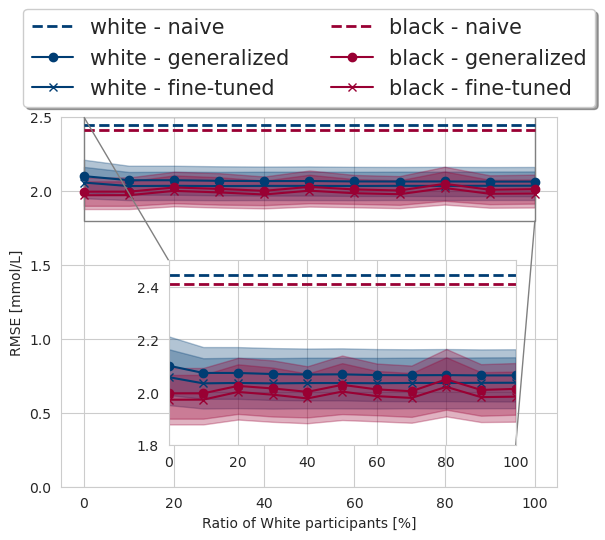

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

gr1_color = "#003d73"
gr2_color = "#990033"
marker1 = "o"
marker2 = "^"
marker3 = "x"


# Plot the predictions
fig, ax = plt.subplots()

# naive
line1, = plt.plot([0, 100], [y_value_gr1, y_value_gr1], color=gr1_color, linestyle='--', linewidth=2, label = f'{group1} - naive')#, label=f'Group 1 - naive ({round(y_value_gr1, 2)})')
# base
line_w_base = plt.plot(df_stats_gr1_race['ratio'], df_stats_gr1_race['rmse_base_mean']  , marker=marker1, linestyle='-', color = gr1_color, label = f'{group1} - generalized')
plt.fill_between(df_stats_gr1_race['ratio'],df_stats_gr1_race['rmse_base_95p_CI_Lower'],df_stats_gr1_race['rmse_base_95p_CI_Upper'], color=gr1_color, alpha=0.3)
# transfeer learned
line_w_tl = plt.plot(df_stats_gr1_race['ratio'], df_stats_gr1_race['rmse_tl_mean']  , marker=marker3, linestyle='-', color = gr1_color, label = f'{group1} - fine-tuned')
plt.fill_between(df_stats_gr1_race['ratio'],df_stats_gr1_race['rmse_tl_95p_CI_Lower'],df_stats_gr1_race['rmse_tl_95p_CI_Upper'], color=gr1_color, alpha=0.3)


# Black Naive
line2, = plt.plot([0, 100], [y_value_gr2, y_value_gr2], color=gr2_color, linestyle='--', linewidth=2, label = f'{group2} - naive')# , label=f'Group 2 - naive ({round(y_value_gr2, 2)})')
# black generalized
line_b_base = plt.plot(df_stats_gr2_race['ratio'], df_stats_gr2_race['rmse_base_mean']  , marker=marker1, linestyle='-', color = gr2_color, label = f'{group2} - generalized')
plt.fill_between(df_stats_gr2_race['ratio'],df_stats_gr2_race['rmse_base_95p_CI_Lower'],df_stats_gr2_race['rmse_base_95p_CI_Upper'], color=gr2_color, alpha=0.3)
#black fine-tuned
line_b_tl = plt.plot(df_stats_gr2_race['ratio'], df_stats_gr2_race['rmse_tl_mean']  , marker=marker3, linestyle='-', color = gr2_color, label = f'{group2} - fine-tuned')
plt.fill_between(df_stats_gr2_race['ratio'],df_stats_gr2_race['rmse_tl_95p_CI_Lower'],df_stats_gr2_race['rmse_tl_95p_CI_Upper'], color=gr2_color, alpha=0.3)


handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2, fancybox=True, shadow=True)
plt.legend(handles=handles, labels=labels, loc='lower center', bbox_to_anchor=(0.5, 1), ncol=2, fancybox=True, shadow=True, fontsize='15')
plt.ylim(0, 2.5)

#####################################
# Create inset of the zoomed-in region
ax_inset = inset_axes(ax, width="70%", height="50%", loc='lower right', borderpad=3 )

# naive
ax_inset.plot([0, 100], [y_value_gr1, y_value_gr1], color=gr1_color, linestyle='--', linewidth=2, label = f'{group1} - naive')#, label=f'Group 1 - naive ({round(y_value_gr1, 2)})')
# base
ax_inset.plot(df_stats_gr1_race['ratio'], df_stats_gr1_race['rmse_base_mean']  , marker=marker1, linestyle='-', color = gr1_color, label = f'{group1} - generalized')
ax_inset.fill_between(df_stats_gr1_race['ratio'],df_stats_gr1_race['rmse_base_95p_CI_Lower'],df_stats_gr1_race['rmse_base_95p_CI_Upper'], color=gr1_color, alpha=0.3)
# transfeer learned
ax_inset.plot(df_stats_gr1_race['ratio'], df_stats_gr1_race['rmse_tl_mean']  , marker=marker3, linestyle='-', color = gr1_color, label = f'{group1} - fine-tuned')
ax_inset.fill_between(df_stats_gr1_race['ratio'],df_stats_gr1_race['rmse_tl_95p_CI_Lower'],df_stats_gr1_race['rmse_tl_95p_CI_Upper'], color=gr1_color, alpha=0.3)


# Black Naive
ax_inset.plot([0, 100], [y_value_gr2, y_value_gr2], color=gr2_color, linestyle='--', linewidth=2, label = f'{group2} - naive')# , label=f'Group 2 - naive ({round(y_value_gr2, 2)})')
# black generalized
ax_inset.plot(df_stats_gr2_race['ratio'], df_stats_gr2_race['rmse_base_mean']  , marker=marker1, linestyle='-', color = gr2_color, label = f'{group2} - generalized')
ax_inset.fill_between(df_stats_gr2_race['ratio'],df_stats_gr2_race['rmse_base_95p_CI_Lower'],df_stats_gr2_race['rmse_base_95p_CI_Upper'], color=gr2_color, alpha=0.3)
#black fine-tuned
ax_inset.plot(df_stats_gr2_race['ratio'], df_stats_gr2_race['rmse_tl_mean']  , marker=marker3, linestyle='-', color = gr2_color, label = f'{group2} - fine-tuned')
ax_inset.fill_between(df_stats_gr2_race['ratio'],df_stats_gr2_race['rmse_tl_95p_CI_Lower'],df_stats_gr2_race['rmse_tl_95p_CI_Upper'], color=gr2_color, alpha=0.3)


# Set the zoomed-in region (e.g., from ratio 20 to 60)
ax_inset.set_xlim(0, 100)
ax_inset.set_ylim(1.8, 2.5) # race
# ax_inset.set_ylim(1.8, 3) # age
ax_inset.set_xticks([0, 20, 40, 60, 80, 100])
# ax_inset.set_yticks([1.8, 2.0, 2.2, 2.4]) # race
# ax_inset.set_yticks([1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0]) # age

# Mark the inset region on the main plot
mark_inset(ax, ax_inset, loc1=2, loc2=4, fc="none", ec="0.5")
ax.set_xlabel('Ratio of White participants [%]')
ax.set_ylabel('RMSE [mmol/L]')


plt.grid(True)
plt.show()



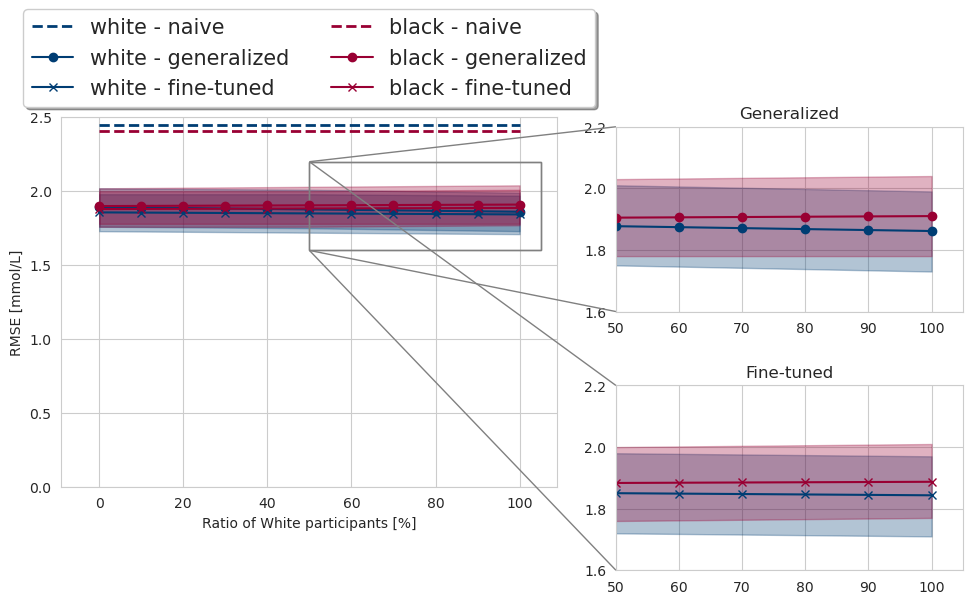

In [24]:

gr1_color = "#003d73"
gr2_color = "#990033"
marker1 = "o"
marker2 = "^"
marker3 = "x"
w_m_a_ci_25  = [1.76, 1.75, 1.73]
w_m_a_ci_975 = [2.02, 2.01, 1.99]
x = [0, 50, 100]

b_m_a_ci_25  = [1.78, 1.78, 1.78]
b_m_a_ci_975 = [2.02, 2.03, 2.04]

w_m_a_ci_25_tl  = [1.73, 1.72, 1.71]
w_m_a_ci_975_tl = [1.98, 1.98, 1.97]


b_m_a_ci_25_tl  = [1.76, 1.76, 1.77]
b_m_a_ci_975_tl = [2.00, 2.00, 2.01]


# Plot the predictions
fig, ax_lmem = plt.subplots()


# naive
line1, = plt.plot([0, 100], [y_value_gr1, y_value_gr1], color=gr1_color, linestyle='--', linewidth=2, label = 'White -Naive')#, label=f'Group 1 - naive ({round(y_value_gr1, 2)})')

line_w_m_a_base =plt.plot(df_w_m_a['ratio10'], df_w_m_a['prediction'], marker=marker1, linestyle='-', color = gr1_color, label = 'White_male_adult - generalized')
plt.fill_between(x,w_m_a_ci_25, w_m_a_ci_975, color=gr1_color, alpha=0.3)

line_w_m_a_tl =plt.plot(df_tl_w_m_a['ratio10'], df_tl_w_m_a['prediction'], marker=marker3, linestyle='-', color = gr1_color, label = 'White_male_adult - fine-tuned')
plt.fill_between(x,w_m_a_ci_25_tl, w_m_a_ci_975_tl, color=gr1_color, alpha=0.3)
# # plt.plot(df_w_f_a['ratio10'], df_w_f_a['prediction'], marker='o', linestyle='-', color = 'b')
# # plt.plot(df_w_m_c['ratio10'], df_w_m_c['prediction'], marker='o', linestyle='-', color = 'b')
# # plt.plot(df_w_f_c['ratio10'], df_w_f_c['prediction'], marker='o', linestyle='-', color = 'b')


line2, = plt.plot([0, 100], [y_value_gr2, y_value_gr2], color=gr2_color, linestyle='--', linewidth=2, label = 'Black - Naive')# , label=f'Group 2 - naive ({round(y_value_gr2, 2)})')

line_b_m_a_base = plt.plot(df_b_m_a['ratio10'], df_b_m_a['prediction'], marker=marker1, linestyle='-', color = gr2_color,label = 'Black_male_adult - generalized' )
plt.fill_between(x,b_m_a_ci_25, b_m_a_ci_975, color=gr2_color, alpha=0.3)

line_b_m_a_tl = plt.plot(df_tl_b_m_a['ratio10'], df_tl_b_m_a['prediction'], marker=marker3, linestyle='-', color = gr2_color,label = 'Black_male_adult - fine-tuned' )
plt.fill_between(x,b_m_a_ci_25_tl, b_m_a_ci_975_tl, color=gr2_color, alpha=0.3)
# plt.plot(df_b_f_a['ratio10'], df_b_f_a['prediction'], marker='o', linestyle='-', color = 'r')
# plt.plot(df_b_m_c['ratio10'], df_b_m_c['prediction'], marker='o', linestyle='-', color = 'r')
# plt.plot(df_b_f_c['ratio10'], df_b_f_c['prediction'], marker='o', linestyle='-', color = 'r')
# plt.title()

ax_lmem.set_xlabel('Ratio of White participants [%]')
ax_lmem.set_ylabel('RMSE [mmol/L]')
# ax.set_title('Race')
# Customizing legend
handles_lmem, labels_lmem = ax_lmem.get_legend_handles_labels()
legend = ax_lmem.legend(handles_lmem, labels_lmem, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2, fancybox=True, shadow=True)
plt.legend(handles=handles, labels=labels, loc='lower center', bbox_to_anchor=(0.5, 1), ncol=2, fancybox=True, shadow=True, fontsize='15')
plt.ylim(0, 2.5)
plt.xlim(-9, 109)
#####################################
# Create inset of the zoomed-in region
ax_inset1 = inset_axes(ax_lmem, width="70%", height="50%", bbox_to_anchor=(0.65, 0.7, 1, 1), bbox_transform=ax.transAxes, loc='lower right', borderpad=-6 )

# ax_inset1.plot([0, 100], [y_value_gr1, y_value_gr1], color=gr1_color, linestyle='--', linewidth=2, label = 'White -Naive')#, label=f'Group 1 - naive ({round(y_value_gr1, 2)})')
# ax_inset1.plot([0, 100], [y_value_gr2, y_value_gr2], color=gr2_color, linestyle='--', linewidth=2, label = 'Black - Naive')# , label=f'Group 2 - naive ({round(y_value_gr2, 2)})')

ax_inset1.plot(df_w_m_a['ratio10'], df_w_m_a['prediction'], marker=marker1, linestyle='-', color = gr1_color, label = 'White_male_adult - generalized')
ax_inset1.fill_between(x,w_m_a_ci_25, w_m_a_ci_975, color=gr1_color, alpha=0.3)

ax_inset1.plot(df_b_m_a['ratio10'], df_b_m_a['prediction'], marker=marker1, linestyle='-', color = gr2_color,label = 'Black_male_adult - generalized' )
ax_inset1.fill_between(x,b_m_a_ci_25, b_m_a_ci_975, color=gr2_color, alpha=0.3)

# Set the zoomed-in region
ax_inset1.set_xlim(50, 105)
ax_inset1.set_ylim(1.6, 2.2)
# ax_inset1.set_xticks([0, 20, 40, 60, 80, 100])
ax_inset1.set_title("Generalized")
##########
# Create inset of the zoomed-in region
ax_inset2 = inset_axes(ax_lmem, width="70%", height="50%", bbox_to_anchor=(0.65, 0, 1, 1), bbox_transform=ax.transAxes, loc='lower right', borderpad=-6 )

# ax_inset1.plot([0, 100], [y_value_gr1, y_value_gr1], color=gr1_color, linestyle='--', linewidth=2, label = 'White -Naive')#, label=f'Group 1 - naive ({round(y_value_gr1, 2)})')
# ax_inset1.plot([0, 100], [y_value_gr2, y_value_gr2], color=gr2_color, linestyle='--', linewidth=2, label = 'Black - Naive')# , label=f'Group 2 - naive ({round(y_value_gr2, 2)})')

# ax_inset2.plot(df_w_m_a['ratio10'], df_w_m_a['prediction'], marker=marker1, linestyle='-', color = gr1_color, label = 'White_male_adult - generalized')
# ax_inset2.fill_between(x,w_m_a_ci_25, w_m_a_ci_975, color=gr1_color, alpha=0.3)
ax_inset2.plot(df_tl_w_m_a['ratio10'], df_tl_w_m_a['prediction'], marker=marker3, linestyle='-', color = gr1_color, label = 'White_male_adult - fine-tuned')
ax_inset2.fill_between(x,w_m_a_ci_25_tl, w_m_a_ci_975_tl, color=gr1_color, alpha=0.3)

# ax_inset2.plot(df_b_m_a['ratio10'], df_b_m_a['prediction'], marker=marker1, linestyle='-', color = gr2_color,label = 'Black_male_adult - generalized' )
# ax_inset2.fill_between(x,b_m_a_ci_25, b_m_a_ci_975, color=gr2_color, alpha=0.3)

ax_inset2.plot(df_tl_b_m_a['ratio10'], df_tl_b_m_a['prediction'], marker=marker3, linestyle='-', color = gr2_color,label = 'Black_male_adult - fine-tuned' )
ax_inset2.fill_between(x,b_m_a_ci_25_tl, b_m_a_ci_975_tl, color=gr2_color, alpha=0.3)

# Set the zoomed-in region
ax_inset2.set_xlim(50, 105)
ax_inset2.set_ylim(1.6, 2.2)
# ax_inset2.set_xticks([60, 80, 100])
ax_inset2.set_title("Fine-tuned")


# Mark the inset region on the main plot
# mark_inset(ax, ax_inset, loc1=2, loc2=4, fc="none", ec="0.5")
mark_inset(ax_lmem, ax_inset1, loc1=2, loc2=3, fc="none", ec="0.5")
mark_inset(ax_lmem, ax_inset2, loc1=2, loc2=3, fc="none", ec="0.5")
ax_lmem.set_xlabel('Ratio of White participants [%]')
ax_lmem.set_ylabel('RMSE [mmol/L]')


plt.grid(True)
plt.show()